<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.075220,76.683356,73.515125,0.008001,207.281702,207.275606,0.006095
1,0.0,1.0,93.204756,21.521860,64.548635,-0.008842,189.266409,189.268799,-0.002390
2,0.0,2.0,98.340669,96.486522,79.802674,0.000734,284.630598,284.624672,0.005926
3,0.0,3.0,93.710314,44.148697,40.862947,-0.001520,188.720438,188.717846,0.002591
4,0.0,4.0,44.474499,42.846568,76.698919,-0.006055,174.013932,174.020722,-0.006790
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.275661,61.512679,41.524603,0.006213,170.319156,170.312531,0.006625
59996,999.0,56.0,68.951454,64.417959,81.226833,-0.001193,224.595053,224.594553,0.000501
59997,999.0,57.0,71.593868,48.090445,99.660340,-0.008440,229.336213,229.342351,-0.006138
59998,999.0,58.0,43.843667,70.813039,92.959903,-0.008555,217.608054,217.616334,-0.008280


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.075220  76.683356  73.515125  0.008001  207.281702   
      1.0    93.204756  21.521860  64.548635 -0.008842  189.266409   
      2.0    98.340669  96.486522  79.802674  0.000734  284.630598   
      3.0    93.710314  44.148697  40.862947 -0.001520  188.720438   
      4.0    44.474499  42.846568  76.698919 -0.006055  174.013932   
...                ...        ...        ...       ...         ...   
999.0 55.0   57.275661  61.512679  41.524603  0.006213  170.319156   
      56.0   68.951454  64.417959  81.226833 -0.001193  224.595053   
      57.0   71.593868  48.090445  99.660340 -0.008440  229.336213   
      58.0   43.843667  70.813039  92.959903 -0.008555  217.608054   
      59.0   62.139122  84.634288  53.424424 -0.004046  210.193788   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.275606  0.006095  
      1.0    189.268799 -0.002390  
      2.0    284.624672  0.005926  
      3.0    188.717846  0.002591  
      4.0    174.020722 -0.006790  
...                 ...       ...  
999.0 55.0   170.312531  0.006625  
      56.0   224.594553  0.000501  
      57.0   229.342351 -0.006138  
      58.0   217.616334 -0.008280  
      59.0   210.197185 -0.003396  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.075220  76.683356  73.515125  0.008001  207.281702   
      1.0    93.204756  21.521860  64.548635 -0.008842  189.266409   
      2.0    98.340669  96.486522  79.802674  0.000734  284.630598   
      3.0    93.710314  44.148697  40.862947 -0.001520  188.720438   
      4.0    44.474499  42.846568  76.698919 -0.006055  174.013932   
...                ...        ...        ...       ...         ...   
999.0 55.0   57.275661  61.512679  41.524603  0.006213  170.319156   
      56.0   68.951454  64.417959  81.226833 -0.001193  224.595053   
      57.0   71.593868  48.090445  99.660340 -0.008440  229.336213   
      58.0   43.843667  70.813039  92.959903 -0.008555  217.608054   
      59.0   62.139122  84.634288  53.424424 -0.004046  210.193788   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.275606  0.006095  
      1.0    189.268799 -0.002390  
      2.0    284.624672  0.005926  
      3.0    188.717846  0.002591  
      4.0    174.020722 -0.006790  
...                 ...       ...  
999.0 55.0   170.312531  0.006625  
      56.0   224.594553  0.000501  
      57.0   229.342351 -0.006138  
      58.0   217.616334 -0.008280  
      59.0   210.197185 -0.003396  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.075220,76.683356,73.515125,0.008001,207.281702,207.275606,0.006095
1,0.0,1.0,93.204756,21.521860,64.548635,-0.008842,189.266409,189.268799,-0.002390
2,0.0,2.0,98.340669,96.486522,79.802674,0.000734,284.630598,284.624672,0.005926
3,0.0,3.0,93.710314,44.148697,40.862947,-0.001520,188.720438,188.717846,0.002591
4,0.0,4.0,44.474499,42.846568,76.698919,-0.006055,174.013932,174.020722,-0.006790
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.275661,61.512679,41.524603,0.006213,170.319156,170.312531,0.006625
59996,999.0,56.0,68.951454,64.417959,81.226833,-0.001193,224.595053,224.594553,0.000501
59997,999.0,57.0,71.593868,48.090445,99.660340,-0.008440,229.336213,229.342351,-0.006138
59998,999.0,58.0,43.843667,70.813039,92.959903,-0.008555,217.608054,217.616334,-0.008280


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.075220  76.683356  73.515125  0.008001  207.281702   
      1.0    93.204756  21.521860  64.548635 -0.008842  189.266409   
      2.0    98.340669  96.486522  79.802674  0.000734  284.630598   
      3.0    93.710314  44.148697  40.862947 -0.001520  188.720438   
      4.0    44.474499  42.846568  76.698919 -0.006055  174.013932   
...                ...        ...        ...       ...         ...   
999.0 55.0   57.275661  61.512679  41.524603  0.006213  170.319156   
      56.0   68.951454  64.417959  81.226833 -0.001193  224.595053   
      57.0   71.593868  48.090445  99.660340 -0.008440  229.336213   
      58.0   43.843667  70.813039  92.959903 -0.008555  217.608054   
      59.0   62.139122  84.634288  53.424424 -0.004046  210.193788   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.275606  0.006095  
      1.0    189.268799 -0.002390  
      2.0    284.624672  0.005926  
      3.0    188.717846  0.002591  
      4.0    174.020722 -0.006790  
...                 ...       ...  
999.0 55.0   170.312531  0.006625  
      56.0   224.594553  0.000501  
      57.0   229.342351 -0.006138  
      58.0   217.616334 -0.008280  
      59.0   210.197185 -0.003396  

[60000 rows x 7 columns]

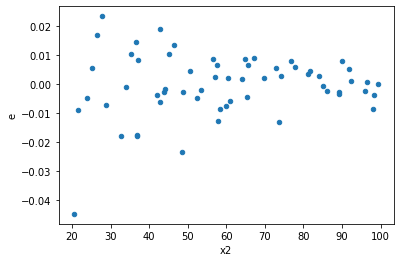

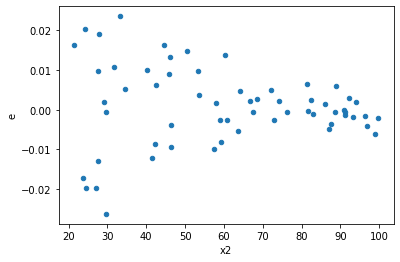

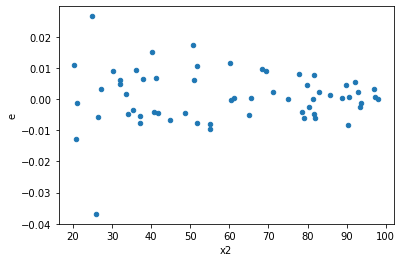

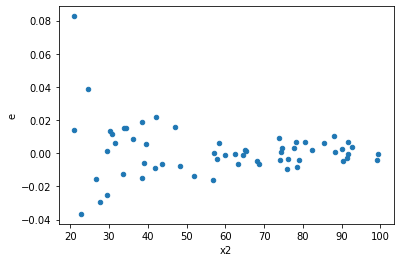

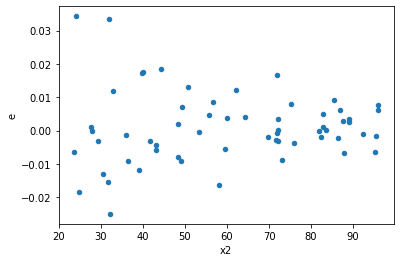

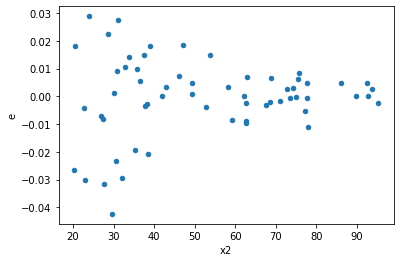

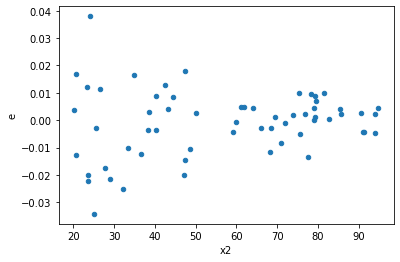

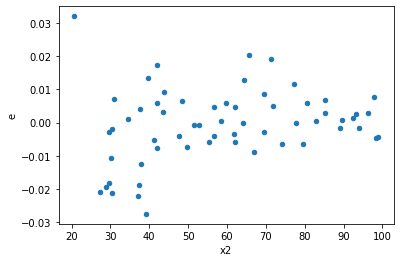

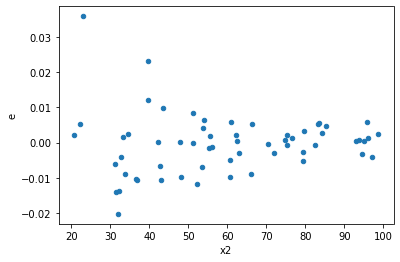

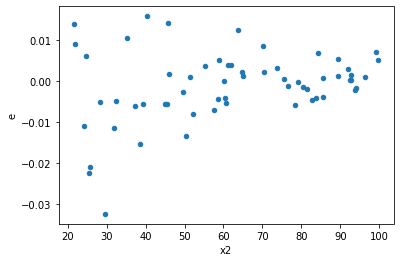

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,27.0,27.0,0.0004068637630771524,0.005165483987752367,1.5069028262116755e-05,0.00019131422176860618,12.69585659014035,3.843525719915419e-09,0.9999999980782371,1.9217628599577097e-09,Reject001=0 : Heteroscedasticity
2.0,27.0,27.0,0.0005921794667947928,0.003521365960451748,2.1932572844251583e-05,0.00013042096149821288,5.946450625029866,1.4751267561896597e-05,0.999992624366219,7.375633780948299e-06,Reject001=0 : Heteroscedasticity
3.0,27.0,27.0,0.0029791375327233435,0.010242667863130342,0.00011033842713790161,0.00037935806900482746,3.438131925976283,0.0020246690703868975,0.9989876654648066,0.0010123345351934487,Reject001=0 : Heteroscedasticity
4.0,24.0,30.0,0.0008650036889254101,0.005623186198814708,3.604182037189209e-05,0.00018743953996049027,5.200612455931016,3.513944808353209e-05,0.9999824302759582,1.7569724041766044e-05,Reject001=0 : Heteroscedasticity
5.0,22.0,32.0,0.0007595664058387587,0.009156909003282216,3.452574571994358e-05,0.00028615340635256925,8.288116603583584,1.4300140027678765e-07,0.9999999284992999,7.150070013839382e-08,Reject001=0 : Heteroscedasticity
7.0,25.0,29.0,0.002054195359785261,0.0038592160604272703,8.216781439141044e-05,0.00013307641587680243,1.619568645733795,0.21177179869160212,0.8941141006541989,0.10588589934580106,Reject001=1 : Homoscedasticity
9.0,24.0,30.0,0.0008959688682458626,0.0025638012005764397,3.733203617691094e-05,8.546004001921465e-05,2.2891877532270755,0.03270795011110339,0.9836460249444483,0.016353975055551695,Reject001=1 : Homoscedasticity
13.0,27.0,27.0,0.001230412887483598,0.002055075675756885,4.557084768457771e-05,7.611391391692167e-05,1.670232567183087,0.1890582064585462,0.9054708967707269,0.0945291032292731,Reject001=1 : Homoscedasticity
15.0,31.0,23.0,0.0019397597430092681,0.003379686730056901,6.257289493578284e-05,0.0001469429013068218,2.3483474986673705,0.0374625374468005,0.9812687312765997,0.01873126872340025,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,23.0,0.004158199940823335,0.001491707667466617,0.00013413548196204305,6.485685510724421e-05,0.4835175164584496,0.05980626383660509,Reject001=1 : Homoscedasticity
1.0,27.0,27.0,0.0004068637630771524,0.005165483987752367,1.5069028262116755e-05,0.00019131422176860618,12.69585659014035,3.843525719915419e-09,Reject001=0 : Heteroscedasticity
2.0,27.0,27.0,0.0005921794667947928,0.003521365960451748,2.1932572844251583e-05,0.00013042096149821288,5.946450625029866,1.4751267561896597e-05,Reject001=0 : Heteroscedasticity
3.0,27.0,27.0,0.0029791375327233435,0.010242667863130342,0.00011033842713790161,0.00037935806900482746,3.438131925976283,0.0020246690703868975,Reject001=0 : Heteroscedasticity
4.0,24.0,30.0,0.0008650036889254101,0.005623186198814708,3.604182037189209e-05,0.00018743953996049027,5.200612455931016,3.513944808353209e-05,Reject001=0 : Heteroscedasticity
5.0,22.0,32.0,0.0007595664058387587,0.009156909003282216,3.452574571994358e-05,0.00028615340635256925,8.288116603583584,1.4300140027678765e-07,Reject001=0 : Heteroscedasticity
6.0,25.0,29.0,0.007164242305329846,0.0009840172966213677,0.00028656969221319386,3.39316309179782e-05,0.11840620917000086,7.413803373895561e-07,Reject001=0 : Heteroscedasticity
7.0,25.0,29.0,0.002054195359785261,0.0038592160604272703,8.216781439141044e-05,0.00013307641587680243,1.619568645733795,0.21177179869160212,Reject001=1 : Homoscedasticity
8.0,25.0,29.0,0.00220908833528199,0.0018496974201706571,8.83635334112796e-05,6.378266966105714e-05,0.7218211766633054,0.4110314979438233,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      523
Reject001=0 : Heteroscedasticity    477
Name: Result_test, dtype: int64